#**Machine Learning Based Prediction of COVID-19 Diagnosis based on Symptoms**

**Libraries**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

**Load CSV Data Into Variable**

In [5]:
# Store CSV FIle Data Into Variable
df = pd.read_csv("/content/drive/MyDrive/Dataset/Covid Dataset.csv")

# Display Top 5 Rows
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


#**Preprocessing**

**Counting NULL Values By Columns**

In [6]:
# Counting NULL Values By Columns
df.isnull().sum(axis = 0)

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

**Counting NULL Values By Rows**

In [7]:
# Counting NULL Values By Rows
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
5429    0
5430    0
5431    0
5432    0
5433    0
Length: 5434, dtype: int64

In [8]:
# Display Columns Names
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

**Label Encoder**

In [9]:
# Create Object of Label Encoder
le = LabelEncoder()

In [10]:
# Assign Data To New Variable
df_le = df
for col in df_le.columns:
  df_le[col] =le.fit_transform(df_le[col])

In [11]:
# Display Data
df_le.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


**Define X & Y Data**

In [12]:
# X
X = df_le.drop(['COVID-19'], axis="columns")

# Display Top 5 Rows
X.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0


In [13]:
# y
y = df_le['COVID-19']

# Display Top 5 Rows
y.head()

0    1
1    1
2    1
3    1
4    1
Name: COVID-19, dtype: int64

**Split Train & Test Data**

In [14]:
# Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#**Logistic Regression**

In [15]:
# Create Model
lr = LogisticRegression()

In [16]:
# Fit Train Data
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Y Predicted : This is predicted by our model.
y_predicted = lr.predict(X_test)
print(y_test)
print(y_predicted)

361     1
5418    1
1954    1
1950    1
3958    1
       ..
535     1
3084    1
463     1
4380    0
5402    1
Name: COVID-19, Length: 1631, dtype: int64
[1 1 1 ... 1 0 1]


In [18]:
# Accuracy of Model
lr.score(X_test, y_test)

0.9711833231146536

In [19]:
# Accuracy, Precision, Recall, F1 Score
lr_accuracy = accuracy_score(y_test, y_predicted)*100
lr_precision = precision_score(y_test, y_predicted)*100
lr_recall = recall_score(y_test, y_predicted)*100
lr_f1 = f1_score(y_test, y_predicted)*100

print('Accuracy : %.3f' % (lr_accuracy))
print('Precision : %.3f' % (lr_precision))
print('Recall : %.3f' % (lr_recall))
print('F1 Score : %.3f' % (lr_f1))

Accuracy : 97.118
Precision : 97.973
Recall : 98.491
F1 Score : 98.231


**Confusion Matrix**

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 279,   27],
       [  20, 1305]])

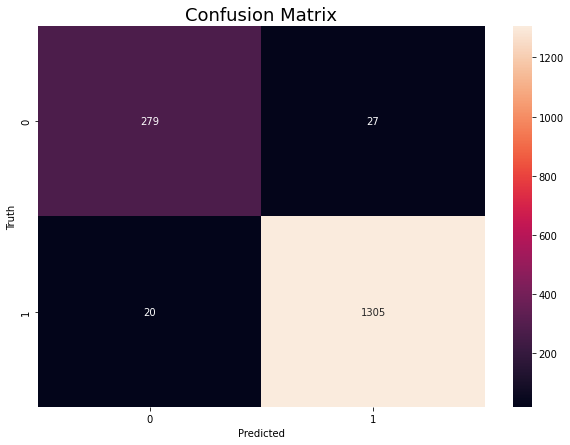

In [22]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix',fontsize=18)
plt.show()

#**Naive Bayes**

In [23]:
# Create Model
model = GaussianNB()

In [24]:
# Fit Training Data
model.fit(X_train, y_train)

GaussianNB()

In [25]:
# Y Predicted : This is predicted by our model.
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 0])

In [26]:
# Accuracy of Model
model.score(X_test, y_test)

0.7314530962599632

In [28]:
# Accuracy, Precision, Recall, F1 Score
nb_accuracy = accuracy_score(y_test, y_predicted)*100
nb_precision = precision_score(y_test, y_predicted)*100
nb_recall = recall_score(y_test, y_predicted)*100
nb_f1 = f1_score(y_test, y_predicted)*100

print('Accuracy : %.3f' % (nb_accuracy))
print('Precision : %.3f' % (nb_precision))
print('Recall : %.3f' % (nb_recall))
print('F1 Score : %.3f' % (nb_f1))

Accuracy : 73.145
Precision : 100.000
Recall : 66.943
F1 Score : 80.199


**Confusion Matrix**

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[306,   0],
       [438, 887]])

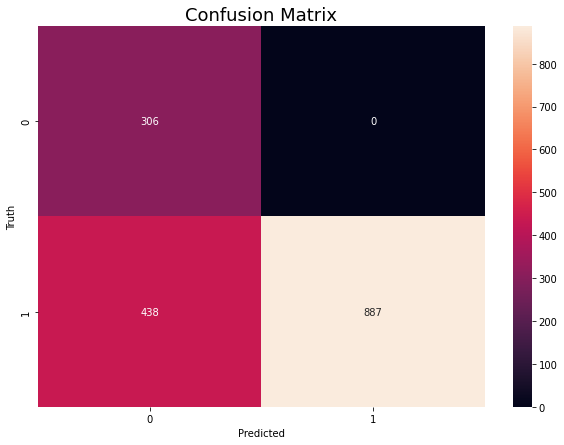

In [30]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**SVM With RBF Kernel**

In [31]:
# Create Model
svm = SVC(kernel='rbf')

In [32]:
# Fit Training Data
svm.fit(X_train, y_train)

SVC()

In [33]:
# Y Predicted : This is predicted by our model.
y_predicted = svm.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 0, 1])

In [34]:
# Accuracy of Model
svm.score(X_test, y_test)

0.9779276517473943

In [35]:
# Accuracy, Precision, Recall, F1 Score
svm_accuracy = accuracy_score(y_test, y_predicted)*100
svm_precision = precision_score(y_test, y_predicted)*100
svm_recall = recall_score(y_test, y_predicted)*100
svm_f1 = f1_score(y_test, y_predicted)*100

print('Accuracy : %.3f' % (svm_accuracy))
print('Precision : %.3f' % (svm_precision))
print('Recall : %.3f' % (svm_recall))
print('F1 Score : %.3f' % (svm_f1))

Accuracy : 97.793
Precision : 99.161
Recall : 98.113
F1 Score : 98.634


**Confusion Matrix**

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 295,   11],
       [  25, 1300]])

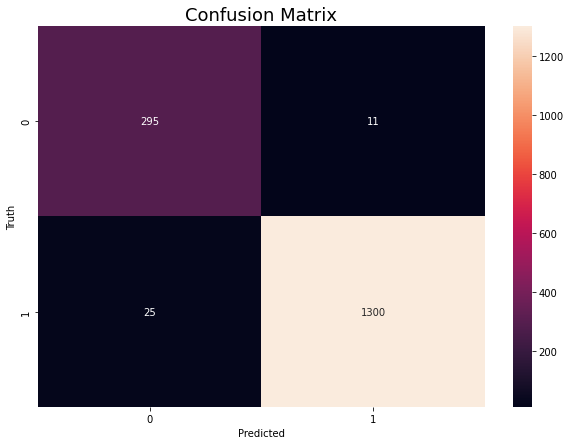

In [37]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**SVM With Linear Kernel**

In [38]:
# Create Model
svm_l = SVC(kernel='linear')

In [39]:
# Fit Training Data
svm_l.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
# Y Predicted : This is predicted by our model.
y_predicted = svm_l.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 0, 1])

In [41]:
# Accuracy of Model
svm_l.score(X_test, y_test)

0.9699570815450643

In [42]:
# Accuracy, Precision, Recall, F1 Score
svm_l_accuracy = accuracy_score(y_test, y_predicted)*100
svm_l_precision = precision_score(y_test, y_predicted)*100
svm_l_recall = recall_score(y_test, y_predicted)*100
svm_l_f1 = f1_score(y_test, y_predicted)*100

print('Accuracy : %.3f' % (svm_l_accuracy))
print('Precision : %.3f' % (svm_l_precision))
print('Recall : %.3f' % (svm_l_recall))
print('F1 Score : %.3f' % (svm_l_f1))

Accuracy : 96.996
Precision : 98.115
Recall : 98.189
F1 Score : 98.152


**Confusion Matrix**

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 281,   25],
       [  24, 1301]])

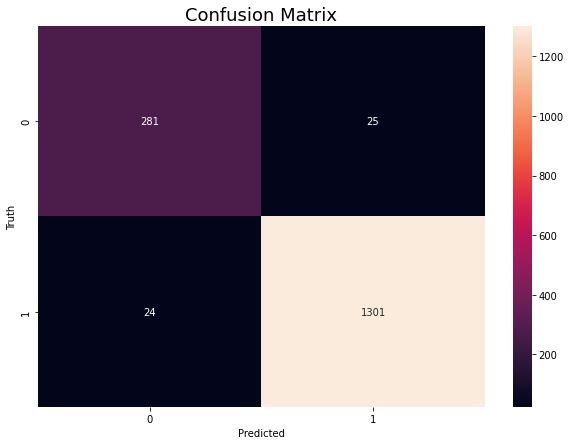

In [44]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**SVM With Poly Kernel**

In [45]:
# Create Model
svm_p= SVC(kernel='poly')

In [46]:
# Fit Training Data
svm_p.fit(X_train, y_train)

SVC(kernel='poly')

In [47]:
# Y Predicted : This is predicted by our model.
y_predicted = svm_p.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 0, 1])

In [48]:
# Accuracy of Model
svm_p.score(X_test, y_test)

0.9779276517473943

In [65]:
# Accuracy, Precision, Recall, F1 Score
svm_p_accuracy = accuracy_score(y_test, y_predicted)*100
svm_p_precision = precision_score(y_test, y_predicted)*100
svm_p_recall = recall_score(y_test, y_predicted)*100
svm_p_f1 = f1_score(y_test, y_predicted)*100

print('Accuracy : %.3f' % (svm_p_accuracy))
print('Precision : %.3f' % (svm_p_precision))
print('Recall : %.3f' % (svm_p_recaall))
print('F1 Score : %.3f' % (svm_p_f1))

Accuracy : 97.793
Precision : 99.161
Recall : 98.113
F1 Score : 98.634


**Confusion Matrix**

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 295,   11],
       [  25, 1300]])

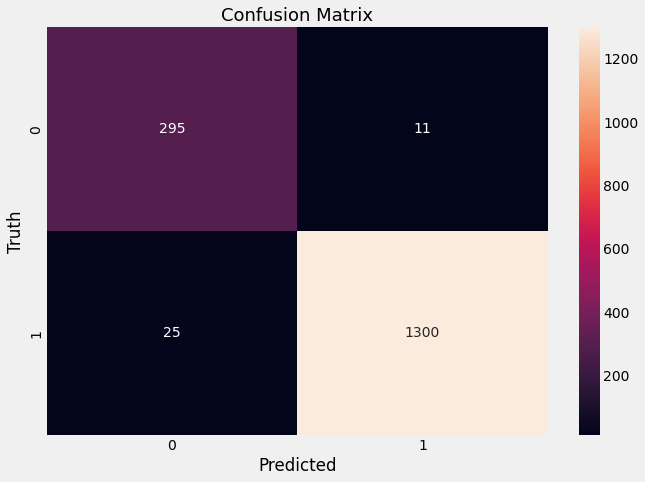

In [67]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#**Random Forest**

In [53]:
# Create Model
random_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [54]:
# Fit Training Data
random_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [55]:
# Y Predicted : This is predicted by our model.
y_predicted = random_model.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 0, 1])

In [56]:
# Accuracy of Model
random_model.score(X_test, y_test)

0.9779276517473943

In [57]:
# Accuracy, Precision, Recall, F1 Score
random_model_accuracy = accuracy_score(y_test, y_predicted)*100
random_model_precision = precision_score(y_test, y_predicted)*100
random_model_recall = recall_score(y_test, y_predicted)*100
random_model_f1 = f1_score(y_test, y_predicted)*100

print('Accuracy : %.3f' % (random_model_accuracy))
print('Precision : %.3f' % (random_model_precision))
print('Recall : %.3f' % (random_model_recall))
print('F1 Score : %.3f' % (random_model_f1))

Accuracy : 97.793
Precision : 99.161
Recall : 98.113
F1 Score : 98.634


**Confusion Matrix**

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 295,   11],
       [  25, 1300]])

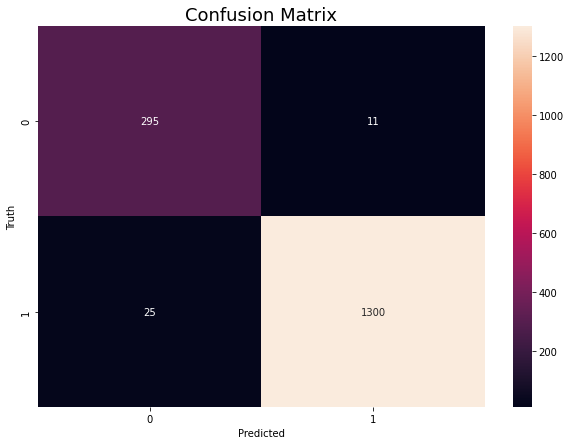

In [59]:
# Confusion Matrix Using Seaborn
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True,fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [60]:
# Import Libraries
from sklearn.tree import export_graphviz

# Pull Out One Tree From The Forest
import pydot  

feature_list = list(X.columns)

# Export The Image To dot File
tree = random_model.estimators_[5] 

# Use dot File To Create Graph
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1) 
(graph, ) = pydot.graph_from_dot_file('tree.dot') 

# Write Graph To PNG File
graph.write_png('tree.png')

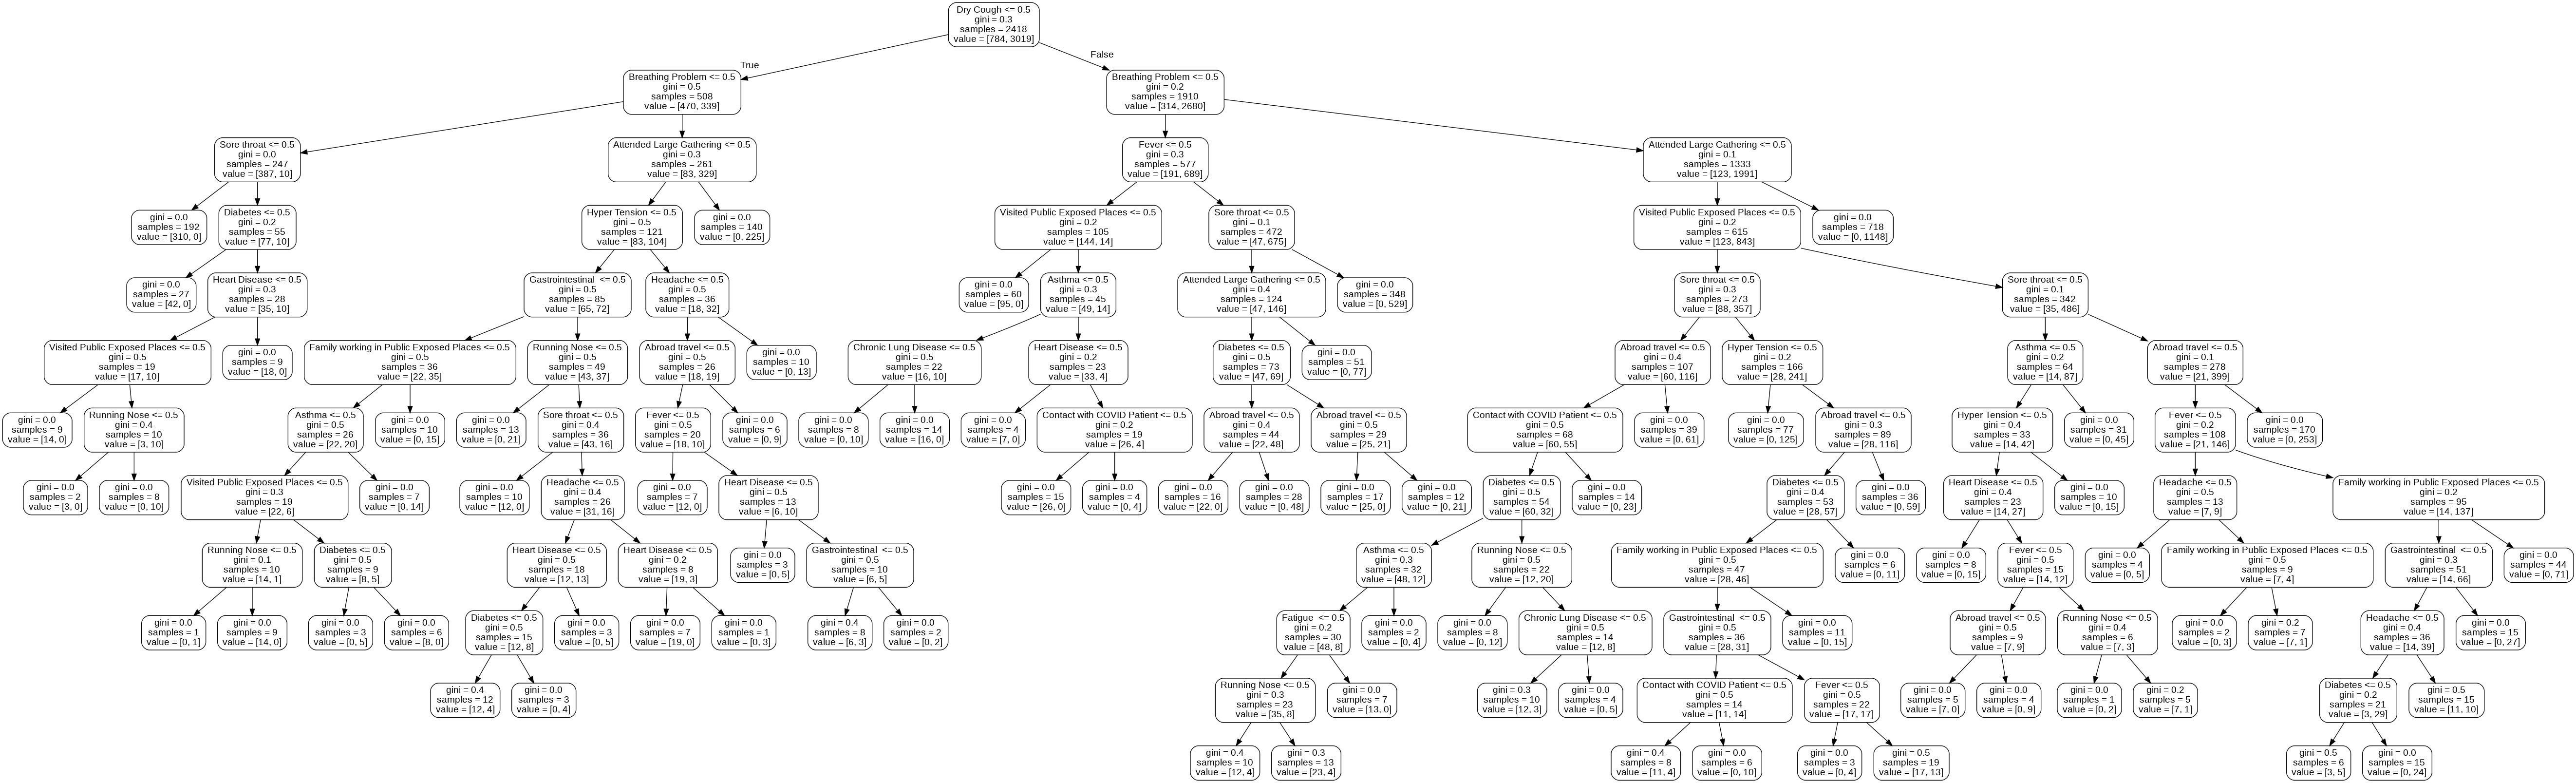

In [61]:
from IPython.display import Image
Image('tree.png')

#**Feature Importance**

In [62]:
# Get Numerical Feature Importances
importances = list(random_model.feature_importances_)

# List of Tuples With Variable & Importance
feature_importances = [(df_le, round(importance, 2)) for feature, importance in zip(df_le.columns, importances)]

# Sort The Feature Importances By Most Important First
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print Out The Feature & Importances 
x_values = list(range(len(importances)))
for i in range(len(x_values)):
  print(x_values[i],"\t", df_le.columns[i], ":\t", importances[i])

0 	 Breathing Problem :	 0.16658451885900719
1 	 Fever :	 0.10912839772684421
2 	 Dry Cough :	 0.1397611959430604
3 	 Sore throat :	 0.11920646208135402
4 	 Running Nose :	 0.021702451725668648
5 	 Asthma :	 0.018595282296163255
6 	 Chronic Lung Disease :	 0.013010530724534074
7 	 Headache :	 0.015618879818881526
8 	 Heart Disease :	 0.025584137624751202
9 	 Diabetes :	 0.01394225048587013
10 	 Hyper Tension :	 0.016651578628097734
11 	 Fatigue  :	 0.016364917180218215
12 	 Gastrointestinal  :	 0.019705577042532917
13 	 Abroad travel :	 0.13054202083773564
14 	 Contact with COVID Patient :	 0.052693296726652995
15 	 Attended Large Gathering :	 0.07807450857743028
16 	 Visited Public Exposed Places :	 0.01735120109819969
17 	 Family working in Public Exposed Places :	 0.025482792622997887
18 	 Wearing Masks :	 0.0
19 	 Sanitization from Market :	 0.0


Text(0.5, 1.0, 'Variable Importances')

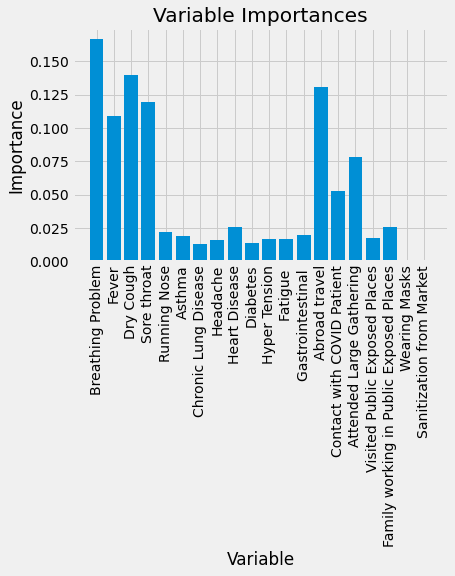

In [63]:
# Set The Style
plt.style.use('fivethirtyeight')

# List of X Locations for Plotting
x_values = list(range(len(importances)))

# Make Bar Chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick Labels for X axis
plt.xticks(x_values, df_le.columns, rotation='vertical')

# Axis Labels & Title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

#**Logistic Regression, Naive Bayes, SVM(RBF, Linear, Poly), Random Forest**

---
**Accuracy, Precision, Recall, F1 Score**


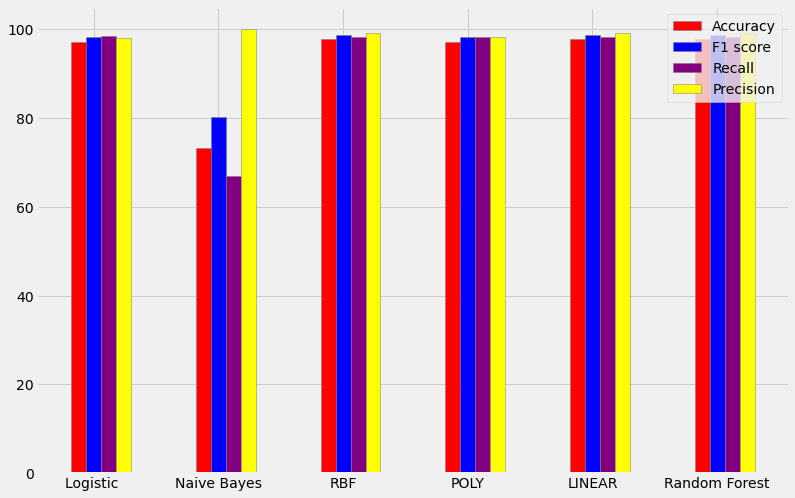

In [68]:
# Set Width of Bar
barWidth = 0.12

# Set Height of Bar
fig = plt.subplots(figsize =(12, 8))

Accuracy = [lr_accuracy, nb_accuracy, svm_accuracy, svm_l_accuracy, svm_p_accuracy, random_model_accuracy]
F1_score = [lr_f1, nb_f1, svm_f1, svm_l_f1, svm_p_f1, random_model_f1]
Precision = [lr_precision, nb_precision, svm_precision, svm_l_precision, svm_p_precision, random_model_precision]
Recall = [lr_recall, nb_recall, svm_recall, svm_l_recall, svm_p_recall, random_model_recall]


# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, Accuracy, color ='red', width = barWidth,
		edgecolor ='grey', label ='Accuracy')
plt.bar(br2, F1_score, color ='Blue', width = barWidth,
		edgecolor ='grey', label ='F1 score')
plt.bar(br3, Recall, color ='Purple', width = barWidth,
		edgecolor ='grey', label ='Recall')
plt.bar(br4, Precision, color ='Yellow', width = barWidth,
		edgecolor ='grey', label ='Precision')


# Adding Xticks
plt.xticks([r + barWidth for r in range(len(Accuracy))],
		['Logistic ','Naive Bayes','RBF','POLY','LINEAR','Random Forest'])

plt.legend()
plt.show()